In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# confirm that you are currently using the newest version of SDK (2.10.0 for now)
import allensdk
allensdk.__version__

'2.10.0'

In [4]:
# import behavior projet cache class from SDK to be able to load the data
import allensdk.brain_observatory.behavior.behavior_project_cache as bpc

### Load data tables 

This code block allows you to use behavior project cache (bpc) class to get behavior and ophys tables.

In [122]:

my_cache_dir = "/home/iryna.yavorska/tmp"
bc = bpc.VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=my_cache_dir)

# the production bucket is set as default:
# bucket_name="visual_behavior_ophys_data"
# project_name="visual-behavior-ophys"

behavior_session_table = bc.get_behavior_session_table()  
session_table = bc.get_session_table()   
experiment_table = bc.get_experiment_table()                         

#print number of items in each table for all imaging and behavioral sessions
print('Number of behavior sessions = {}'.format(len(behavior_session_table)))
print('Number of ophys sessions = {}'.format(len(session_table)))
print('Number of ophys experiments = {}'.format(len(experiment_table)))


#print number of items in each table with Mesoscope imaging
print('Number of behavior sessions with Mesoscope = {}'.format(len(behavior_session_table[behavior_session_table.project_code.isin(['VisualBehaviorMultiscope'])])))
print('Number of ophys sessions with Mesoscope = {}'.format(len(session_table[session_table.project_code.isin(['VisualBehaviorMultiscope'])])))
print('Number of ophys experiments with Mesoscope = {}'.format(len(experiment_table[experiment_table.project_code.isin(['VisualBehaviorMultiscope'])])))



Number of behavior sessions = 3572
Number of ophys sessions = 551
Number of ophys experiments = 1165
Number of behavior sessions with Mesoscope = 133
Number of ophys sessions with Mesoscope = 133
Number of ophys experiments with Mesoscope = 747


Let's see expriment table and pick one to look at

In [120]:
experiment_table.head(5)


,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,session_type,cre_line,indicator,...,prior_exposures_to_image_set,prior_exposures_to_omissions,ophys_session_id,behavior_session_id,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
951980471,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,OPHYS_1_images_A,Sst-IRES-Cre,GCaMP6f,...,3.0,0,951410079,951520319,1018028342,VisualBehaviorMultiscope,150,VISp,2019-09-20 09:45:29.897856,1085394308
951980484,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,OPHYS_1_images_A,Sst-IRES-Cre,GCaMP6f,...,3.0,0,951410079,951520319,1018028351,VisualBehaviorMultiscope,75,VISl,2019-09-20 09:45:29.897856,1085400876
951980473,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,OPHYS_1_images_A,Sst-IRES-Cre,GCaMP6f,...,3.0,0,951410079,951520319,1018028345,VisualBehaviorMultiscope,225,VISp,2019-09-20 09:45:29.897856,1085400919
951980479,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,OPHYS_1_images_A,Sst-IRES-Cre,GCaMP6f,...,3.0,0,951410079,951520319,1018028354,VisualBehaviorMultiscope,150,VISl,2019-09-20 09:45:29.897856,1085400977
951980475,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,OPHYS_1_images_A,Sst-IRES-Cre,GCaMP6f,...,3.0,0,951410079,951520319,1018028339,VisualBehaviorMultiscope,75,VISp,2019-09-20 09:45:29.897856,1085400920


You can also get any other experiment ids from the experiment table. You can search by any columns in the table. Here, we can select experiments from Sst mice only, novel Ophys session 4, with 0 prior exposures to the stimulus (aka not a retake). 

In [124]:
# get all Sst experiments for ophys session 4
selected_experiment_table = experiment_table[(experiment_table.cre_line=='Sst-IRES-Cre')&
                        (experiment_table.session_number==4) &
                        (experiment_table.prior_exposures_to_image_set==0)]
print('Number of experiments: {}'.format(len(selected_experiment_table)))

Number of experiments: 27


Note that experiment = imaging plane. Some of these experiments come from the same imaging session. Here, we can check how many unique imaging sessions are associated with experiments selected above.

In [127]:
print('Number of unique sessions: {}'.format(len(selected_experiment_table['ophys_session_id'].unique())))

Number of unique sessions: 11


### Load an experiment

In [135]:
# select first experiment from the table to look at in more detail. 
# Note that python enumeration starts at 0.
ophys_experiment_id = selected_experiment_table.index[0]
experiment_dataset = bc.get_behavior_ophys_experiment(ophys_experiment_id)

behavior_ophys_experiment_957759562.nwb: 100%|█████████████████████████████████████| 263M/263M [00:11<00:00, 23.1MMB/s]


In [136]:
# Show metadata for this experiment
experiment_dataset.metadata

{'equipment_name': 'MESO.1',
 'stimulus_frame_rate': 60.0,
 'imaging_depth': 150,
 'imaging_plane_group_count': 4,
 'ophys_session_id': 957020350,
 'behavior_session_id': 957032492,
 'session_type': 'OPHYS_4_images_B',
 'ophys_experiment_id': 957759562,
 'experiment_container_id': 1018028342,
 'field_of_view_height': 512,
 'behavior_session_uuid': UUID('40897cd4-3279-4a2d-b65d-b3f984e34e17'),
 'field_of_view_width': 512,
 'imaging_plane_group': 0,
 'mouse_id': 457841,
 'sex': 'F',
 'age_in_days': 233,
 'full_genotype': 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
 'reporter_line': 'Ai148(TIT2L-GC6f-ICL-tTA2)',
 'driver_line': ['Sst-IRES-Cre'],
 'cre_line': 'Sst-IRES-Cre',
 'date_of_acquisition': datetime.datetime(2019, 9, 27, 8, 28, 5, tzinfo=tzutc()),
 'ophys_frame_rate': 11.0,
 'indicator': 'GCaMP6f',
 'targeted_structure': 'VISp',
 'excitation_lambda': 910.0,
 'emission_lambda': 520.0}

You can get information about this experiment from the metadata. Here, you can see that this experiment was in Sst Cre line, in a female mouse at 233 days old, recorded using mesoscope (this is one of 4 imaging planes), at the depth os 150 microns, in primary visual cortex (VISp). This experiment is also also from OPHYS 1 session using image set A.  

In [139]:
# show first 10 dff traces for this experiment 
experiment_dataset.dff_traces.head(10)

,cell_roi_id,dff
cell_specimen_id,,
1086614149,1080740882,"[0.3417784869670868, 0.1917504370212555, 0.169..."
1086614819,1080740886,"[0.0, -2.010002374649048, -1.3567286729812622,..."
1086614512,1080740888,"[0.07121878117322922, 0.10929209738969803, 0.0..."
1086613265,1080740947,"[0.3090711534023285, 0.02156120352447033, -0.0..."
1086616398,1080740952,"[0.0, 0.15438319742679596, 0.37885594367980957..."
1086615620,1080740955,"[0.15867245197296143, 0.15752384066581726, 0.2..."
1086615201,1080740967,"[0.42869994044303894, 0.23723232746124268, -0...."
1086616101,1080741008,"[0.727859377861023, 0.20604123175144196, 0.333..."


In [140]:
# show first 10 events traces for this experiment 
experiment_dataset.events.head(10)

,cell_roi_id,events,filtered_events,lambda,noise_std
cell_specimen_id,,,,,
1086614149,1080740882,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0753,0.085235
1086614819,1080740886,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5.3130,0.714571
1086614512,1080740888,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0324,0.055955
1086613265,1080740947,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0272,0.051073
1086616398,1080740952,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0570,0.074011
1086615620,1080740955,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0769,0.086979
1086615201,1080740967,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0872,0.091952
1086616101,1080741008,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.1596,0.123868


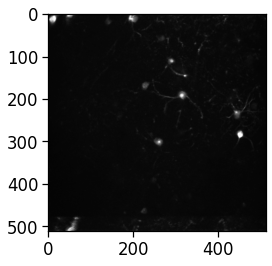

In [141]:
# plot max projection from this experiment
plt.imshow(experiment_dataset.max_projection, cmap='gray')

In [142]:
# if you don't want dff in a pandas table, you can load dataset dff traces as an array
dff_array = np.vstack(dataset.dff_traces.dff.values)
dff_array.shape

(23, 48332)

In [143]:
# load ophys timestamps. The timestamps are the same for dff traces and events, in seconds
dataset.ophys_timestamps

array([   9.65504,    9.74825,    9.84147, ..., 4515.4854 , 4515.57863,
       4515.67187])

In [145]:
# load cell specimen table with some of cell metrics 
experiment_dataset.cell_specimen_table.head(5)

,cell_roi_id,height,mask_image_plane,max_correction_down,max_correction_left,max_correction_right,max_correction_up,valid_roi,width,x,y,roi_mask
cell_specimen_id,,,,,,,,,,,,
1086614149,1080740882,16,0,5.0,25.0,3.0,30.0,True,17,216,456,"[[False, False, False, False, False, False, Fa..."
1086614819,1080740886,22,0,5.0,25.0,3.0,30.0,True,16,443,275,"[[False, False, False, False, False, False, Fa..."
1086614512,1080740888,19,0,5.0,25.0,3.0,30.0,True,22,248,294,"[[False, False, False, False, False, False, Fa..."
1086613265,1080740947,20,0,5.0,25.0,3.0,30.0,True,21,305,183,"[[False, False, False, False, False, False, Fa..."
1086616398,1080740952,20,0,5.0,25.0,3.0,30.0,True,19,220,161,"[[False, False, False, False, False, False, Fa..."


### Pick a cell and plot the traces

In [147]:

cell_specimen_ids = dataset.cell_specimen_table.index.values # a list of all cell ids
cell_specimen_id = cell_specimen_ids[5] # let's pick 6th cell
print('Cell specimen id = {}'.format(cell_specimen_id)) # print id

Cell specimen id = 1086607431


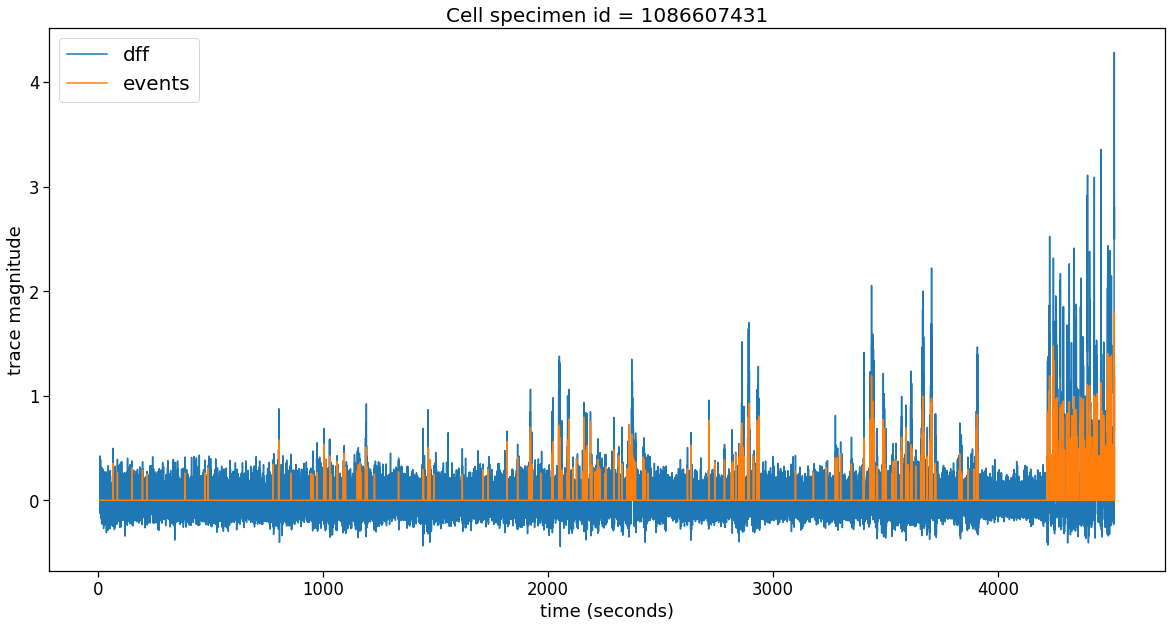

In [148]:
# plot dff and events traces overlaid from the cell selected above
fig, ax = plt.subplots(1,1, figsize = (20,10))
ax.plot(dataset.ophys_timestamps, dataset.dff_traces.loc[cell_specimen_id, 'dff'])
ax.plot(dataset.ophys_timestamps, dataset.events.loc[cell_specimen_id, 'events'])
ax.set_xlabel('time (seconds)')
ax.set_ylabel('trace magnitude')
ax.set_title('Cell specimen id = {}'.format(cell_specimen_id), fontsize = 20)
ax.legend(['dff', 'events'], fontsize = 20)


Text(0.5, 1.0, 'Ophys experiment 957759562')

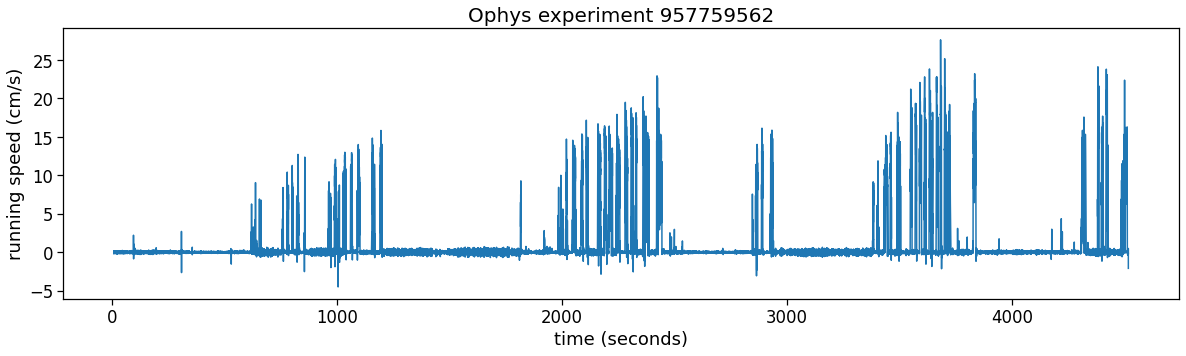

In [149]:
# plot mouse running speed from this experiment
fig, ax = plt.subplots(1,1, figsize = (20,5))
ax.plot(dataset.stimulus_timestamps, dataset.running_speed['speed'])
ax.set_xlabel('time (seconds)')
ax.set_ylabel('running speed (cm/s)')
ax.set_title('Ophys experiment {}'.format(ophys_experiment_id), fontsize = 20)

c:\users\iryna.yavorska\documents\github\allensdk\allensdk\brain_observatory\behavior\session_apis\data_io\behavior_ophys_nwb_api.py:273: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eye_tracking_data["eye_area"][likely_blinks] = np.nan
c:\users\iryna.yavorska\documents\github\allensdk\allensdk\brain_observatory\behavior\session_apis\data_io\behavior_ophys_nwb_api.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eye_tracking_data["pupil_area"][likely_blinks] = np.nan
c:\users\iryna.yavorska\documents\github\allensdk\allensdk\brain_observatory\behavior\session_apis\data_io\behavior_ophys_nwb_api.py:275: SettingWithC

Text(0.5, 1.0, 'Ophys experiment 957759562')

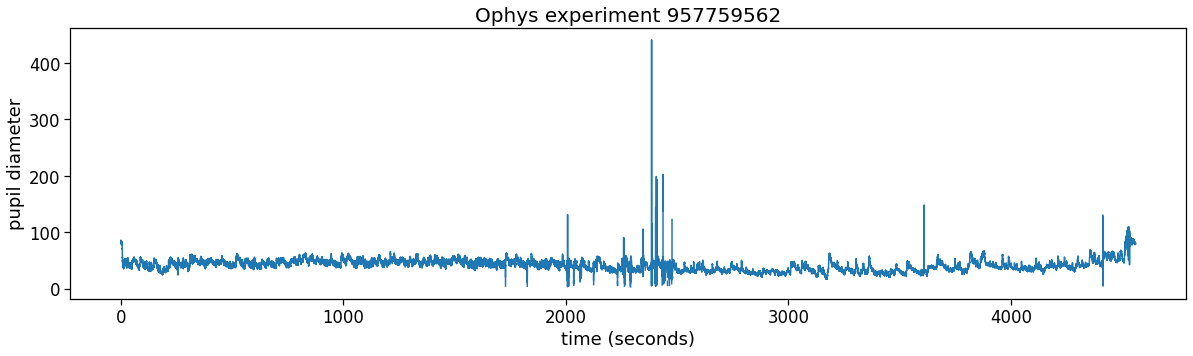

In [150]:
# plot pupil diameter for the same experiment
fig, ax = plt.subplots(1,1, figsize = (20,5))
ax.plot(experiment_dataset.eye_tracking.timestamps, experiment_dataset.eye_tracking.pupil_width)
ax.set_xlabel('time (seconds)')
ax.set_ylabel('pupil diameter')
ax.set_title('Ophys experiment {}'.format(ophys_experiment_id), fontsize = 20)

Large spikes in the trace can be due to blinking. They can be smoothed or filtered.

Text(0.5, 1.0, 'Ophys experiment 957759562')

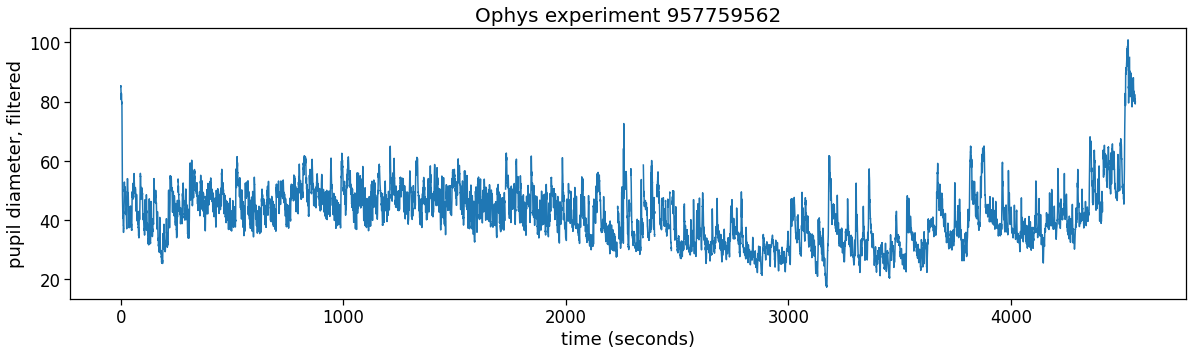

In [173]:
import scipy.signal as signal
# you can smooth or filter signals with your choice of methods in scipy library. 

smoothed_pupil_diameter = signal.savgol_filter(experiment_dataset.eye_tracking.pupil_width, 51, 5, mode='nearest')

fig, ax = plt.subplots(1,1, figsize = (20,5))
ax.plot(experiment_dataset.eye_tracking.timestamps, smoothed_pupil_diameter)
ax.set_xlabel('time (seconds)')
ax.set_ylabel('pupil diameter, filtered')
ax.set_title('Ophys experiment {}'.format(ophys_experiment_id), fontsize = 20)

### Get information about stimuli presented on each trial

In [153]:
# get stimulus information for this experiment and assign it to a table called "stimulus_table"
stimulus_table = experiment_dataset.stimulus_presentations
stimulus_table.head(10)

,duration,end_frame,image_index,image_name,image_set,index,omitted,start_frame,start_time,stop_time
stimulus_presentations_id,,,,,,,,,,
0,0.25020,18001.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,0,False,17986,308.75313,309.00333
1,0.25020,18046.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,1,False,18031,309.50374,309.75394
2,0.25017,18091.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,2,False,18076,310.25441,310.50458
3,0.25026,18136.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,3,False,18121,311.00496,311.25522
4,0.25020,18181.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,4,False,18166,311.75558,312.00578
5,0.25021,18226.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,5,False,18211,312.50620,312.75641
6,0.25022,18271.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,6,False,18256,313.25681,313.50703
7,0.25020,18316.0,6,im031,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,7,False,18301,314.00741,314.25761
8,0.25020,18361.0,6,im031,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,8,False,18346,314.75803,315.00823


This table provides informationa bout image name, start, duration and stop of image presentation, and whether the image was omitted. 

In [154]:
print('This experiment had {} stimuli.'.format(len(stimulus_table)))
print('Out of all stimuli presented, {} were omitted.'.format(len(stimulus_table[stimulus_table['image_name']=='omitted'])))


This experiment had 4797 stimuli.
Out of all stimuli presented, 160 were omitted.


In [155]:
# You can also use "keys()" method to see the names of the columns in the stimulus table
stimulus_table.keys()

Index(['duration', 'end_frame', 'image_index', 'image_name', 'image_set',
       'index', 'omitted', 'start_frame', 'start_time', 'stop_time'],
      dtype='object')

### Get task and behavioral information for each trial

In [157]:
# get behavioral trial information and assign it to "trials_table"
trials_table = experiment_dataset.trials
trials_table.head(5)


,start_time,stop_time,lick_times,reward_time,reward_volume,hit,false_alarm,miss,stimulus_change,aborted,...,catch,auto_rewarded,correct_reject,trial_length,response_time,change_frame,change_time,response_latency,initial_image_name,change_image_name
trials_id,,,,,,,,,,,,,,,,,,,,,
0,308.73646,309.85402,"[309.12011, 309.30359, 309.53711]",NaN,0.000,False,False,False,False,True,...,False,False,False,1.11756,NaN,NaN,NaN,NaN,im000,im000
1,310.23770,318.26089,"[314.37439, 314.50783, 314.64127, 314.79139, 3...",314.14086,0.005,False,False,False,True,False,...,False,True,False,8.02319,314.37439,18300.0,314.026728,0.347662,im000,im031
2,318.49442,319.37846,"[318.6779, 318.86138, 319.06156, 319.39515, 31...",NaN,0.000,False,False,False,False,True,...,False,False,False,0.88404,NaN,NaN,NaN,NaN,im031,im031
3,319.99565,323.19826,"[322.58109, 322.71452, 322.88134, 323.46514, 3...",NaN,0.000,False,False,False,False,True,...,False,False,False,3.20261,NaN,NaN,NaN,NaN,im031,im031
4,323.73205,331.02131,"[327.1515, 327.26826, 327.38503, 327.51846, 32...",326.91797,0.005,False,False,False,True,False,...,False,True,False,7.28926,327.15150,19065.0,326.787158,0.364342,im031,im000


In [158]:
trials_table.keys()

Index(['start_time', 'stop_time', 'lick_times', 'reward_time', 'reward_volume',
       'hit', 'false_alarm', 'miss', 'stimulus_change', 'aborted', 'go',
       'catch', 'auto_rewarded', 'correct_reject', 'trial_length',
       'response_time', 'change_frame', 'change_time', 'response_latency',
       'initial_image_name', 'change_image_name'],
      dtype='object')

This table has information about the trials. "Go" trials are change trials when the animal was supposed to lick. If the animal licked, "hit" is set to True for that trial. If the animal was rewarded, reward time will have time in seconds. If this was an auto_rewarded trial (regardless of whether the animal got it right), "auto_rewarded" is set to True. 

### Plot single trial response for a selected cell

# Below is old code from VBA. Needs to be removed. 

Text(0, 0.5, 'dF/F')

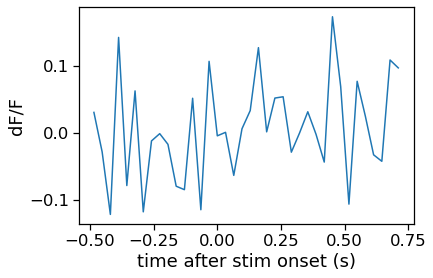

In [36]:
cell_specimen_id = stim_response_df.cell_specimen_id.unique()[0]

trace = stim_response_df[stim_response_df.cell_specimen_id==cell_specimen_id].trace.values[0]
times = stim_response_df[stim_response_df.cell_specimen_id==cell_specimen_id].trace_timestamps.values[0]

plt.plot(times, trace)
plt.xlabel('time after stim onset (s)')
plt.ylabel('dF/F')

#### plot trial averaged trace for some image

Text(0, 0.5, 'dF/F')

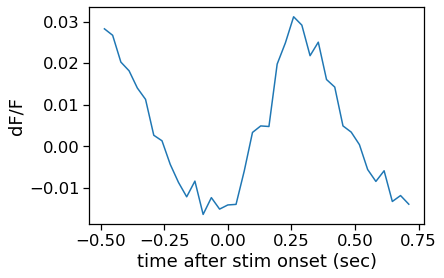

In [37]:
image_name = stim_response_df.image_name.unique()[6]
mean_trace = stim_response_df[(stim_response_df.cell_specimen_id==cell_specimen_id)&
                         (stim_response_df.image_name==image_name)].trace.mean()

plt.plot(times, mean_trace)
plt.xlabel('time after stim onset (sec)')
plt.ylabel('dF/F')


#### responsiveness

Response dataframes include other useful columns including <code>p_value_gray_screen</code> which compares the mean response for each trial to a shuffled distribution of values from the 5 min gray screen periods at the beginning and end of the session.

In [38]:
cell_data = stim_response_df[(stim_response_df.cell_specimen_id==cell_specimen_id)]
fraction_responsive = cell_data.p_value_gray_screen.mean()
print('this cell had a significant response for',fraction_responsive,'of all image presentations')

this cell had a significant response for 0.42011704521775367 of all image presentations


<code>p_value_omission</code> compares the mean response for each trial to a shuffled distribution of all omission responses

<code>p_value_stimulus</code> compares the mean response for each trial to a shuffled distribution of all other stimulus responses

### Get cell responses around change times for behavioral trials

In [39]:
# this creates a dataframe with the response of every cell for every behavioral trial (change and catch)
# cell response is a snippet of the trace in a [-5, 5] second window around change or catch time
trials_response_df = analysis.get_response_df(df_name='trials_response_df')

In [40]:
trials_response_df.head()

,trials_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_gray_screen,p_value_omission,p_value_stimulus,lick_times,...,stop_time,trial_length,behavioral_response_time,change_frame,change_time,behavioral_response_latency,initial_image_name,change_image_name,epoch,trial_type
0,1,992902634,"[-0.03815074026421763, 0.003048901828476412, 0...","[-4.9768954704012, -4.944577967346647, -4.9122...",0.002761,-0.015726,0.4574,0.2387,0.5810,"[312.93787406089467, 313.13803840090236, 313.2...",...,316.819476,8.757088,NaN,18390.0,312.625698,0.312176,im065,im077,0,auto_rewarded
1,1,992902619,"[0.09641908108815547, 0.09690868402531017, -0....","[-4.9768954704012, -4.944577967346647, -4.9122...",0.025997,-0.005630,0.1735,0.1118,0.1658,"[312.93787406089467, 313.13803840090236, 313.2...",...,316.819476,8.757088,NaN,18390.0,312.625698,0.312176,im065,im077,0,auto_rewarded
2,1,992902622,"[0.17414409762475988, 0.007017562703841254, 0....","[-4.9768954704012, -4.944577967346647, -4.9122...",-0.031675,-0.036975,0.9626,0.6955,0.9094,"[312.93787406089467, 313.13803840090236, 313.2...",...,316.819476,8.757088,NaN,18390.0,312.625698,0.312176,im065,im077,0,auto_rewarded
3,1,992902667,"[-0.058920901998085515, 0.0751975029666949, 0....","[-4.9768954704012, -4.944577967346647, -4.9122...",0.035122,-0.012737,0.0053,0.0116,0.0520,"[312.93787406089467, 313.13803840090236, 313.2...",...,316.819476,8.757088,NaN,18390.0,312.625698,0.312176,im065,im077,0,auto_rewarded
4,1,992902649,"[0.03973257094488493, -0.011916020009636069, 0...","[-4.9768954704012, -4.944577967346647, -4.9122...",0.013749,-0.005252,0.2381,0.1305,0.3664,"[312.93787406089467, 313.13803840090236, 313.2...",...,316.819476,8.757088,NaN,18390.0,312.625698,0.312176,im065,im077,0,auto_rewarded


In [41]:
trials_response_df.keys()

Index(['trials_id', 'cell_specimen_id', 'trace', 'trace_timestamps',
       'mean_response', 'baseline_response', 'p_value_gray_screen',
       'p_value_omission', 'p_value_stimulus', 'lick_times', 'reward_time',
       'reward_volume', 'hit', 'false_alarm', 'miss', 'stimulus_change',
       'aborted', 'go', 'catch', 'auto_rewarded', 'correct_reject',
       'start_time', 'stop_time', 'trial_length', 'behavioral_response_time',
       'change_frame', 'change_time', 'behavioral_response_latency',
       'initial_image_name', 'change_image_name', 'epoch', 'trial_type'],
      dtype='object')

Text(0, 0.5, 'dF/F')

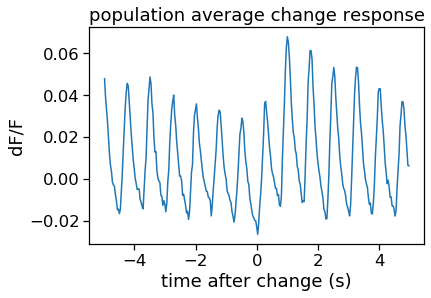

In [42]:
# popuation average response to image change
times = trials_response_df.trace_timestamps.values[0]
plt.plot(times, trials_response_df.trace.mean())
plt.title('population average change response')
plt.xlabel('time after change (s)')
plt.ylabel('dF/F')

### Get omission triggered responses 

In [43]:
# this creates a dataframe with the response of every cell for every omission
# cell response is a snippet of the trace in a [-.5, 0.75] second window around the omission time
omission_response_df = analysis.get_response_df(df_name='omission_response_df')

In [44]:
omission_response_df.head()

,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_gray_screen,p_value_omission,p_value_stimulus,duration,end_frame,image_index,image_name,omitted,start_frame,start_time,stop_time,change,epoch
0,13,992902634,"[0.06147743803837265, 0.09811394600566481, -0....","[-4.9768954704012, -4.944577967346647, -4.9122...",-0.022100,0.081356,0.9397,0.6861,0.8978,NaN,NaN,8,omitted,True,18570,315.611458,NaN,False,0
1,13,992902619,"[0.035646207486238396, 0.09467837212364097, -0...","[-4.9768954704012, -4.944577967346647, -4.9122...",0.004468,0.022521,0.4312,0.3168,0.4275,NaN,NaN,8,omitted,True,18570,315.611458,NaN,False,0
2,13,992902622,"[0.03751269891512046, 0.031581023467236055, -0...","[-4.9768954704012, -4.944577967346647, -4.9122...",-0.045896,0.105504,0.9986,0.7910,0.9679,NaN,NaN,8,omitted,True,18570,315.611458,NaN,False,0
3,13,992902667,"[0.0965439604768864, 0.08151458477178207, -0.0...","[-4.9768954704012, -4.944577967346647, -4.9122...",-0.010811,0.012836,0.8854,0.5734,0.8752,NaN,NaN,8,omitted,True,18570,315.611458,NaN,False,0
4,13,992902649,"[0.01413418952678909, 0.017499694952640088, -0...","[-4.9768954704012, -4.944577967346647, -4.9122...",-0.050514,-0.007053,0.9996,0.9497,0.9986,NaN,NaN,8,omitted,True,18570,315.611458,NaN,False,0


In [45]:
omission_response_df.keys()

Index(['stimulus_presentations_id', 'cell_specimen_id', 'trace',
       'trace_timestamps', 'mean_response', 'baseline_response',
       'p_value_gray_screen', 'p_value_omission', 'p_value_stimulus',
       'duration', 'end_frame', 'image_index', 'image_name', 'omitted',
       'start_frame', 'start_time', 'stop_time', 'change', 'epoch'],
      dtype='object')

Text(0, 0.5, 'dF/F')

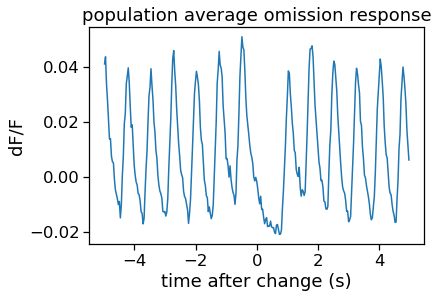

In [46]:
# popuation average response
times = omission_response_df.trace_timestamps.values[0]
plt.plot(times, omission_response_df.trace.mean())
plt.title('population average omission response')
plt.xlabel('time after change (s)')
plt.ylabel('dF/F')

### Get running behavior for omissions 

In [47]:
# similar functionality exist for pupil area

In [48]:
# this creates a dataframe with the running speed for every stimulus presentation
# trace is a snippet of the run speed in a [-.5, 0.75] second window around stim onset
run_speed_df = analysis.get_response_df(df_name='omission_run_speed_df')

In [49]:
run_speed_df.head()

,index,stimulus_presentations_id,trace,trace_timestamps,mean_response,baseline_response,p_value_gray_screen,p_value_omission,p_value_stimulus,duration,end_frame,image_index,image_name,omitted,start_frame,start_time,stop_time,change,epoch
0,0,13,"[-0.00016060630793646145, 0.5354614350559986, ...","[-4.987550032383085, -4.970869263044011, -4.95...",0.534435,0.103630,0.4292,0.4599,0.4350,NaN,NaN,8,omitted,True,18570,315.611458,NaN,False,0
1,2,16,"[-0.3437265019526322, 0.0, -1.032246505591008,...","[-4.987550032383085, -4.970869263044011, -4.95...",0.878759,0.606875,0.3966,0.3750,0.3477,NaN,NaN,8,omitted,True,18705,317.863278,NaN,False,0
2,4,65,"[-0.5682678530338965, 0.0, 0.26821311521739294...","[-4.987550032383085, -4.970869263044011, -4.95...",0.418636,0.565243,0.4499,0.4840,0.4823,NaN,NaN,8,omitted,True,20910,354.643648,NaN,False,0
3,6,83,"[4.498058470411964, 4.494026760860603, 4.67906...","[-4.987550032383085, -4.970869263044011, -4.95...",0.140254,0.278003,0.5925,0.6905,0.6702,NaN,NaN,8,omitted,True,21720,368.154328,NaN,False,0
4,8,112,"[-0.4557277514262342, -1.4477480731869061, -0....","[-4.987550032383085, -4.970869263044011, -4.95...",0.332757,-0.103283,0.4704,0.5363,0.5254,NaN,NaN,8,omitted,True,23025,389.922088,NaN,False,0


Text(0, 0.5, 'run speed (cm/s)')

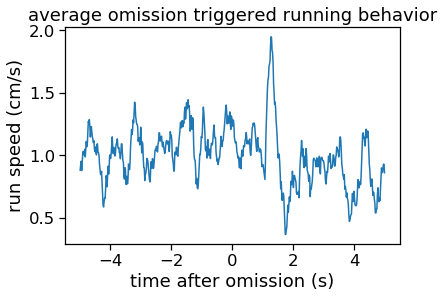

In [50]:
# running speed averaged across all omissions
times = run_speed_df.trace_timestamps.values[0]
plt.plot(times, run_speed_df.trace.mean())
plt.title('average omission triggered running behavior')
plt.xlabel('time after omission (s)')
plt.ylabel('run speed (cm/s)')

## get trial averaged response dataframe for some set of conditions 

VBA <code>response_analysis.utilities</code> has a function for averaging across trials for a given set of conditions: the <code>get_mean_df()</code> function

In [51]:
import visual_behavior.ophys.response_analysis.utilities as utilities

In [52]:
help(utilities.get_mean_df) # needs documentation...

Help on function get_mean_df in module visual_behavior.ophys.response_analysis.utilities:

get_mean_df(response_df, analysis=None, conditions=['cell', 'change_image_name'], flashes=False, omitted=False, get_reliability=True, get_pref_stim=True, exclude_omitted_from_pref_stim=True)



In [53]:
conditions = ['cell_specimen_id', 'image_name'] # conditions to groupby before averaging
mean_df = utilities.get_mean_df(stim_response_df, conditions=conditions, flashes=True)

must provide analysis object to get_mean_df to compute reliability


In [54]:
mean_df.head()

,cell_specimen_id,image_name,mean_response,sem_response,mean_trace,sem_trace,mean_responses,mean_baseline,sem_baseline,pref_stim,fraction_significant_p_value_gray_screen,fraction_significant_p_value_omission,fraction_significant_p_value_stimulus
0,992902610,im061,0.018958,0.001573,"[0.058872061780354444, 0.05138391212826471, 0....","[0.00370197924587146, 0.0034974144274466123, 0...","[0.0036268214358501734, 0.13944951742997472, 0...",-0.021492,0.001324,False,0.273345,0.421053,0.037351
1,992902610,im062,0.033404,0.002743,"[0.08306927150626427, 0.08526279749068161, 0.0...","[0.005519338900810428, 0.005177066580588507, 0...","[-0.02392596034673746, 0.00845526016713901, 0....",-0.019322,0.001996,True,0.379245,0.484906,0.133962
2,992902610,im063,0.007894,0.000866,"[0.027186728000039476, 0.018352709413017133, 0...","[0.002772098306642578, 0.0026699980707104933, ...","[0.008744712535756797, 0.020758640342032657, 0...",-0.011394,0.001081,False,0.114679,0.292049,0.001529
3,992902610,im065,0.022101,0.002025,"[0.0455716524699372, 0.04208194785666107, 0.04...","[0.004074824042247801, 0.00389590430182417, 0....","[0.006816229003447735, 0.034424611020797295, 0...",-0.020504,0.002048,False,0.310000,0.438333,0.048333
4,992902610,im066,0.018859,0.001694,"[0.0490406622024347, 0.0468189239810095, 0.037...","[0.003905212882222808, 0.003986599834452291, 0...","[0.00705282651318867, 0.11928168150913265, 0.0...",-0.018818,0.001688,False,0.298077,0.463462,0.036538


The resulting dataframe includes useful columns such as <code>pref_stim</code> which indicates the stimulus that evoked the maximal response across conditions for that cell, or  <code>fraction_significant_p_value_gray_screen</code> which tells you the fraction of trials for the given condition that had a significant p_value compared to the gray screen periods, or <code>mean_responses</code> which has an array of the mean response value for all trials of a given condition (useful for things like computing variability or noise correlations)

### plot mean trace for a cells preferred stimulus

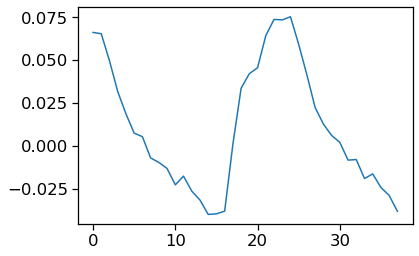

In [57]:
mean_trace = mean_df[(mean_df.cell_specimen_id==cell_specimen_id)&(mean_df.pref_stim==True)].mean_trace.values[0]
plt.plot(mean_trace)